# Optical Flow Test
- ```sample_video``` 폴더에 frame 넣을 것
- ```optical_flow_img``` 폴더를 미리 만들어 놓을 것

In [9]:
import os
import cv2
import numpy as np
import glob
from PIL import Image

In [10]:
path = './sample_video/'
MAX = len(glob.glob(path+'*.jpg')) # sample sequence: 303

In [11]:
opt_img_save_dir = './optical_flow_img/'

In [12]:
# dense optical flow extraction
index = 0
frame1 = np.array(Image.open(path+'{}.jpg'.format(index)))
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

for _ in range(MAX):
    index += 1
    try:
        frame2 = np.array(Image.open(path+'{}.jpg'.format(index))) # for test
        nxt = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    except:
        print('end of video')
        break
    
    flow = cv2.calcOpticalFlowFarneback(prvs, nxt, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

#     cv2.imshow('dense optical flow',rgb)
    k = cv2.waitKey(30) & 0xff
    if k == 27: # ESC
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.jpg',frame2)
        cv2.imwrite('opticalhsv.jpg',rgb)
        
    # save optical flow image
    cv2.imwrite(opt_img_save_dir+'{}.jpg'.format(index-1), rgb)
    
    prvs = nxt

cv2.destroyAllWindows()

end of video


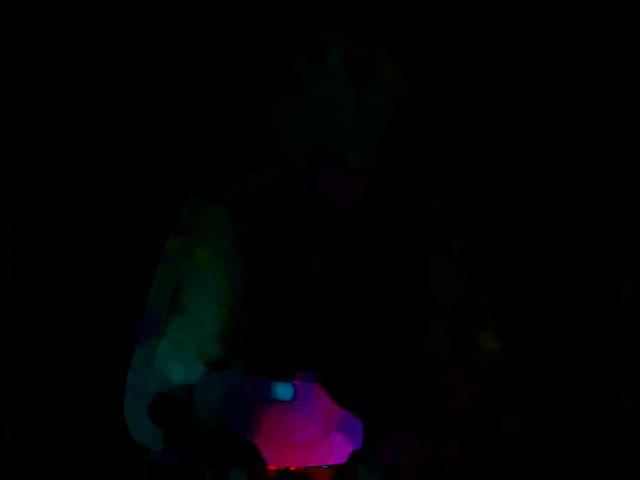

In [14]:
# check optical flow image
Image.open('optical_flow_img/0.jpg')

In [15]:
np.array(Image.open('optical_flow_img/0.jpg')).shape

(480, 640, 3)